# Machine Learning 1

### predicting numbers

## Introduction to Linear Regression



In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Suppose we are exploring a new drug therapy (called the "*Treatment*" here) to increase blood flow in patients with a certain disease.

We do some experiments, giving different patients different dosages of the drug (from 0 to 5mg). We then measure the "*Repsonse*" (their blood flow rate) in the these patients.

The data is here.

In [35]:
r = np.random.RandomState(123)

w0 = 2
w1 = 0.5

N = 20

x = np.linspace(0,5,N)
y = w1*x + w0 + r.normal(0,0.3,N)

df = pd.DataFrame({'Treatment':x, 'Response':y})
df

### Always explore the data visually

In [37]:
df.plot(x='Treatment', y='Response', kind='scatter', 
        figsize=(5,3), xlim=[-0.5,5.8], ylim=[-1,7])
#plt.plot(x, w1*x + w0, '--k', label=r'$y = 0.5 x + 2$')
plt.xlabel('Treatment')
plt.ylabel('Response')

Now, consider the problem of finding the best *linear model*, to make *predictions* $\hat y$ of 

$\hat y = w_0 + w_1 x~~~~$ 


In this equation:

* $w_0$ and $w_1$ are the *parameters* of the *model*.
* $x$ is the "*independent*" variable. (the **Treatment**)
* $\hat y$ is our *predicted Response* given some Treatment $x$.

### Interactive visualization! (with `ipywidgets`)

In [38]:
from ipywidgets import interact

In [39]:
#%matplotlib inline

xline = np.linspace(0,5)

def f(w1=1, w0=0):
    plt.figure(figsize=(6,4))
    plt.plot(df['Treatment'], df['Response'], 'o')
    plt.plot(x, w1*x + w0)
    plt.xlim(0,5)
    plt.ylim(0, 7)
    plt.grid(True)
#    plt.axhline(0, color='k')
#    plt.axvline(0, color="k")
    plt.title(f"$y = w_0 + w_1 x$:    $w_0$={w0:.2f} $w_1$={w1:.2f}")

interact(f, w1=(-1.0, 1.0, 0.05), w0=(-2, 4, 0.05));

---

### Best Fit model

In [40]:
x = df['Treatment']
y = df['Response']

In [41]:
w = np.polyfit(x,y,1)
w

Not the "*original*" values, but a better "fit" to the data.

In [46]:
df.plot(x='Treatment', y='Response', kind='scatter', figsize=(8,6), xlim=[-0.5,5.8], ylim=[-1,7])
#plt.plot(x, w1*x + w0, '--k')
plt.plot(x, w[0]*x + w[1], '-r', label=r'Best fit: $y = w_1 x + w_0$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('')
plt.legend(fontsize=16);

### Remember these *best* model parameters

Note: `np.polyfit()` returns `w[]` with highest power first, `w[0]`, and y-intercept as the last element, `w[n]`.

In [18]:
w

array([0.591, 1.808])

In [19]:
print("w_0 = {:.3}  w_1 = {:.3}".format(w[1],w[0]))

w_0 = 1.81  w_1 = 0.591


---

$~$

## 1: Calculus


### The MSE Surface

We define an *Error Function*, $E_i(w_0, w_1)$ which characterizes the *error* of the prediction of our model for the $i$-th data point. There are many we could choose, but the one standard is:

#### Error for one point: how good is our prediction $\hat y_i$ compared to $y_i$

Let's define the "**Error**" for one (the *i*th)  data point as:

$E_i(w_0, w_1) = \frac{1}{2}(\hat y_i - y_i)^2 = \frac{1}{2}\left(~w_0 + w_1x_i - y_i~\right)^2$

Notice that the "Error" is a function of the model parameters, $w_0$ and $w_1$.

It makes sense to use the difference $(\hat y - y)$ between our prediction: $\hat y$ and the *real* value $y_i$. However, we *square* this, so that the error is always positive. Then our job is to:
* find the parameters $w_0$ and $w_1$ that minimize the Total Error

$~$

### Total Error (Mean Squared Error)

**MSE**

We define the total error as the average of all the individual errors:

*Mean Squared Error* of the model on the entire data set by averaging this over all data:

$\displaystyle{
{\rm MSE}({\bf w}) = \frac{1}{N} \sum_i^N E_i({\bf w})
}$

$\displaystyle{
{\rm MSE}({\bf w}) = \frac{1}{N} \sum_i^N E_i({\bf w}) 
= \frac{1}{N} \sum_i^N\frac{1}{2}\left(~w_0 + w_1 x_i - y_i\right)^2
}$

Now we have to find the "*best*" values for ${\bf w}$, those that minimize the MSE. (That's an easy calculus problem)

---

$~$

Let's *look* at the Error function. For this problem, its a function of two variables, ${\bf w} = (w_0, w_1)$.

In [20]:
def E(w0, w1, x, y):
    N = len(x)
    return ((w0 + w1*x - y)**2).sum()/N

Some example values:

In [29]:
print(E(1,2,x,y))

12.064290997864457


In [22]:
print(E(1.9,0.6,x,y))

0.12981775480357116


Let's visualize this function **MSE($w_0, w_1)$**

In [30]:
from mpl_toolkits import mplot3d

w0mesh = np.linspace(1, 3, 50)
w1mesh = np.linspace(0, 1, 50)
W0, W1 = np.meshgrid(w0mesh, w1mesh)
Z = np.empty_like(W0)
for i in range(50):
    for j in range(50):
        Z[i,j] = E(W0[i,j], W1[i,j], x,y)

In [29]:
%matplotlib notebook 
plt.close(plt.gcf())
plt.figure()

ax = plt.axes(projection='3d')

ax.plot_surface(W0, W1, Z, cmap='RdGy', edgecolor=None, rstride=2, cstride=2, alpha=0.7)
ax.contour3D(W0, W1, Z, 20, cmap='RdGy', offset=-3)
#ax.contourf(W0, W1, Z, 28, cmap='RdGy')

ax.set_zlim(-3,6)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('MSE')

In [27]:
from ipywidgets import interact # interactive

In [28]:
%matplotlib inline

plt.close(plt.gcf())
#plt.figure()

def linmodel2(w0, w1):
    plt.close()
    df.plot(x='Treatment', y='Response', kind='scatter', figsize=(8,6), xlim=[-0.5,5.8], ylim=[-1,7])
    plt.plot(x, w1*x + w0, '-r', label=r'$\hat y = w_1 x + w_0$')
    for i in range(len(df['Treatment'])):
#        print([df['x'].iloc[i], df['x'].iloc[i]], [df['y'].iloc[i], w1*df['x'].iloc[i] + w0])
        plt.plot([df['Treatment'].iloc[i], df['Treatment'].iloc[i]], 
                 [df['Response'].iloc[i], w1*df['Treatment'].iloc[i] + w0], '-k')
    plt.xlabel('x data (independent)')
    plt.ylabel('y data (dependent)')
    plt.text(0.2, 5, f'Error = {E(w0,w1,x,y):.3f}', fontsize=14,
            backgroundcolor='#EEEEEE')
    plt.legend(fontsize=16)
    plt.show()
    
#w2 = 
interact(linmodel2, w0=1.0, w1=1.0)
#display(w2)

We want to find the values of $w_0$ and $w_1$ which minimize $E(w_0, w_1)$. This is a standard calculus problem; we have to solve these two equations:

$\displaystyle{
\frac{\partial E}{\partial w_0} = 0
}$

$\displaystyle{
\frac{\partial E}{\partial w_1} = 0
}$

with $E$ defined as the ${\rm MSE}$

$\displaystyle{
{\rm MSE}(w_0,w_1) = \frac{1}{N} \sum_i^N E_i(w_0,w_1) 
= \frac{1}{N} \sum_i^N\frac{1}{2}\left(w_0 + w_1 x_i - y_i\right)^2
}$

$\displaystyle{
~~~~~~~~~~~~~~= \frac{1}{N} \sum_i^N\frac{1}{2}\left(w_0 + w_1 x_i - y_i\right)^2
}$

$~$

$\displaystyle{
\frac{\partial E}{\partial w_0} = \frac{1}{N}\sum_i^N (w_0 + w_1 x_i - y_i)\times 1 = 0
}$

$\displaystyle{
\frac{\partial E}{\partial w_1} = \frac{1}{N}\sum_i^N (w_0 + w_1 x_i - y_i)\times x_i = 0
}$

$~$

You can easily solve these two equations for $w_0$ and $w_1$:

$~~~~~~~~~~~~~~~~w_0 ~~+~ (\frac{1}{N}\sum_i^Nx_i)~w_1 = (\frac{1}{N}\sum_i^N y_i)$

$(\frac{1}{N}\sum_i^N x_i)~w_0 ~+~ (\frac{1}{N}\sum_i^Nx_i^2)~w_1 = (\frac{1}{N}\sum_i^N x_i y_i)$

or 

$~~~~~~~~~~~~~~w_0 ~+~ <x_i>~w_1 = <y_i>$

$<x_i>~w_0 ~+~ <x_i^2>~w_1 = <x_i y_i>$

where $<z_i>$ is the average of the quantity $z_i$ over your dataset: $\displaystyle{<z_i> = \frac{1}{N}\sum_i^N z_i}$

$~$

Then the *exact* minimum solution is, 

$\displaystyle{
w_0 =\frac{<x^2><y> - <x><xy>}{<x^2> - <x>^2}
}$

$~$

$\displaystyle{
w_1 =\frac{<xy> - <x><y>}{<x^2> - <x>^2}
}$



In [8]:
xm = x.mean()
ym = y.mean()

x2m = (x**2).mean()
xym = (x*y).mean()

Recall that our true values for $w_0$ and $w_1$ are:

$w_0 = 2$

$w_1 = \frac{1}{2}$

and our "*best*" ${\bf w}$ values were:

#### Recall the results from `np.polyfit()` above

In [43]:
print(f"w_0 = {w[0]:.3}  w_1 = {w[1]:.3}")

w_0 = 0.591  w_1 = 1.81


Compare:

In [44]:
(x2m*ym - xm*xym)/(x2m - xm**2)

1.8075157929194807

In [45]:
(xym - xm*ym)/(x2m - xm**2)

0.5907238106668431

$~$

---

$~$

## More than 2 dimensions

### 3-D example


This format generalizes easily to *multivariate linear regression*, of the form:

$\hat y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_d x_d$

Here we have $d$ features:

$(x_1, x_2, x_3,... ,x_d)$

and our *linear model* is defined by the $d+1$ coefficients, ${\bf w} = (w_0,...,w_d)$.

$~$

#### Some data

In [46]:
np.random.seed(777)
xdata = np.random.randn(50) #np.linspace(0,10,50)
ydata = np.random.randn(50) #np.linspace(0,10,50)
zdata = 2.0*xdata - ydata + 1.0*np.random.randn(50)

In [47]:
df3d = pd.DataFrame({'x_1':xdata, 'x_2':ydata, 'y':zdata})
df3d

,x_1,x_2,y
0,-0.468209,0.757684,-1.920167
1,-0.822825,-0.152086,-2.372194
2,-0.065380,-0.271279,-0.831086
3,-0.713362,-0.599840,-0.772719
4,0.906351,-2.026904,3.900697
...,...,...,...
45,-0.727618,-2.217795,1.853577
46,-1.403946,-0.906292,-1.780421
47,-1.240611,-1.462125,-1.553991
48,-0.443482,-0.677565,1.253578


<IPython.core.display.Javascript object>


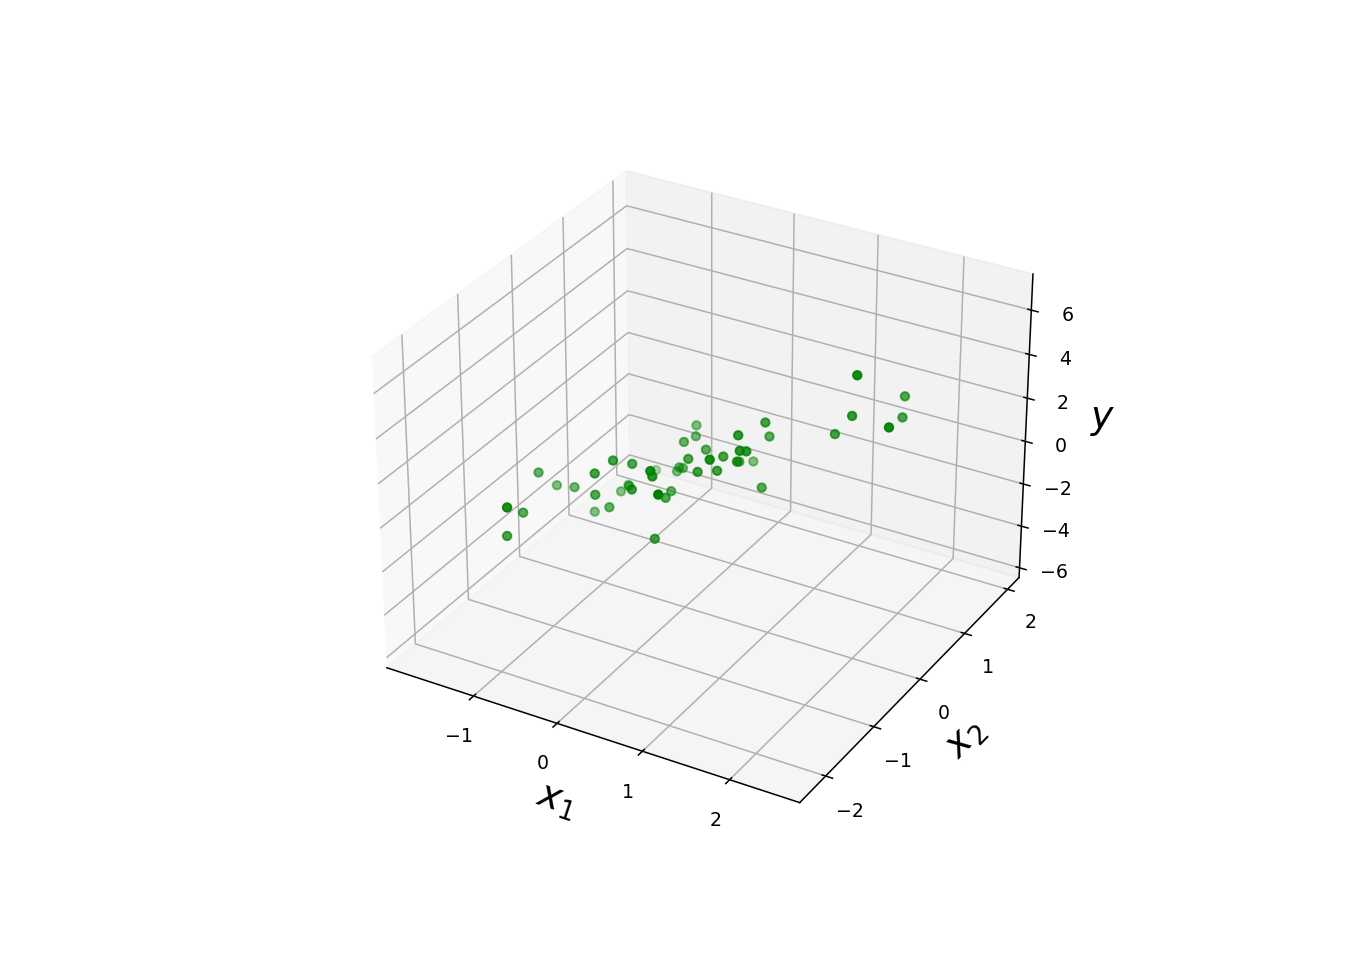

In [48]:
from mpl_toolkits import mplot3d
%matplotlib notebook

plt.figure(figsize=(10,7))

ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c="g")
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$y$', fontsize=20)
plt.show();

### Find the "Best" 3-D Model

We'll use Python's wonderful ***Scikit-Learn*** package for Machine Learning:  `sklearn` 

In [49]:
from sklearn import linear_model

model = linear_model.LinearRegression()

#### "*Fit*" the model to the data

*i.e.* find the optimal model parameters

In [50]:
model.fit(df3d[['x_1', 'x_2']], df3d['y'])

LinearRegression()

#### The results

Recall that our general model in higher dimensions is: $\hat y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_d x_d$ 

* $w_0$ is called the "`model.intercept_`"
* The linear coefficients of each feature (the slopes in each $x_i$ direction) are returned as an **array** called `model.coef_`
* The trailing underscore (`intercept_` and `coef_`) is important.

In [51]:
w = [model.intercept_, model.coef_[0], model.coef_[1]]
print('w_0 =', w[0], '  w_1 =', w[1], '   w_2 =', w[2])

w_0 = 0.1396494121365427   w_1 = 2.110831056909075    w_2 = -1.1923026791554021


<IPython.core.display.Javascript object>


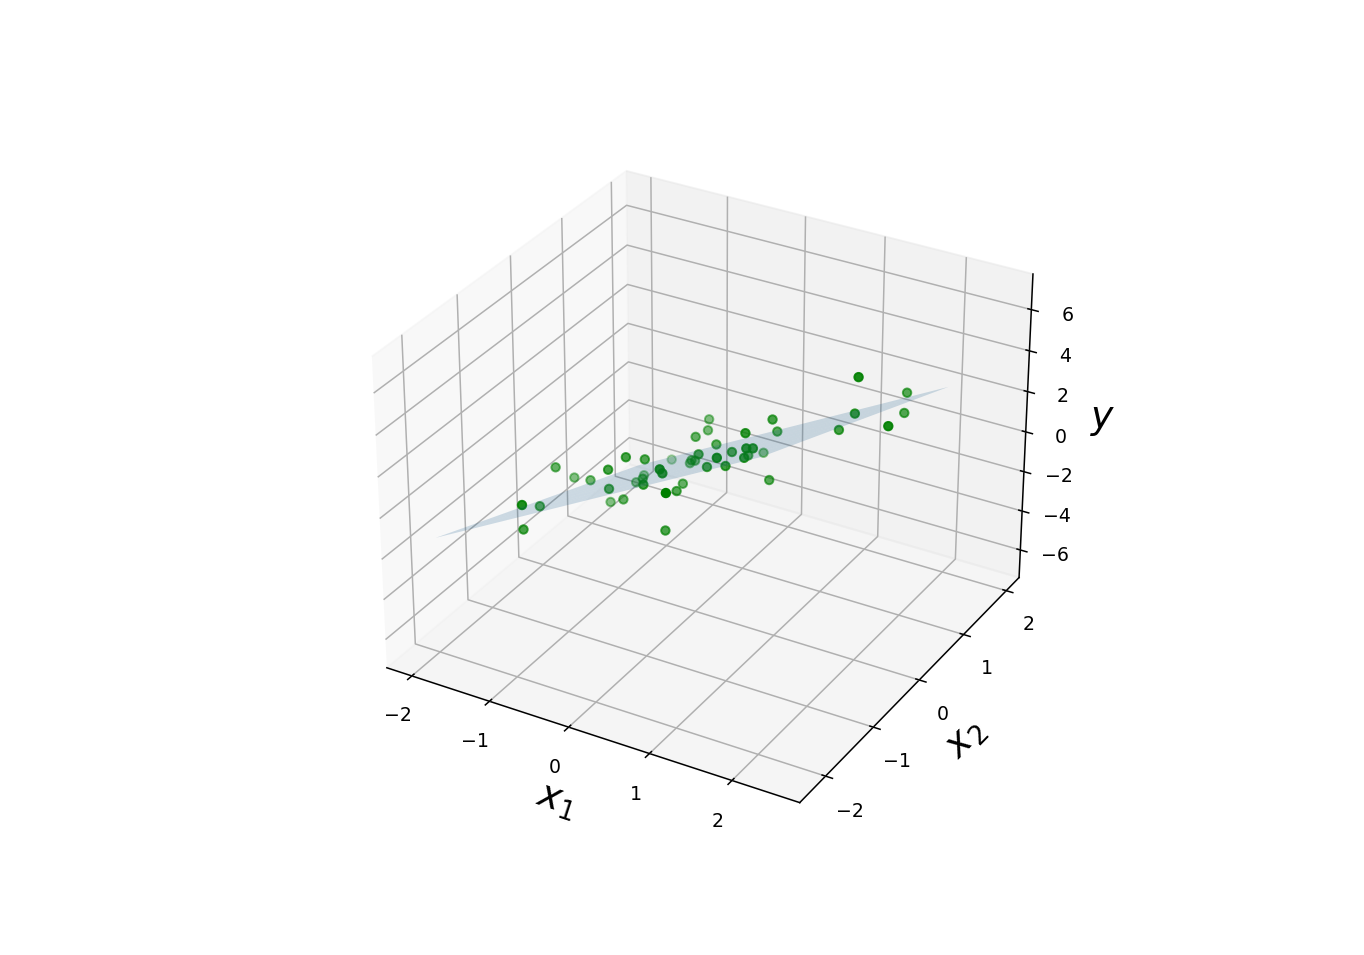

In [52]:
%matplotlib notebook
plt.close(plt.gcf())
plt.figure()
ax = plt.axes(projection='3d')

# a, b span plane
xlin = np.linspace(-2, 2, 10)
ylin = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(xlin, ylin)

# f(x,y) plane function
# See: http://math.stackexchange.com/questions/562123/equation-of-plane-containing-two-vectors
def f(X,Y):
    return w[0] + w[1]*X + w[2]*Y

Z = f(X,Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.2)


ax.scatter3D(xdata, ydata, zdata, c="g")
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$y$', fontsize=20)
plt.show();

---

### Make a prediction using this model.

In [53]:
f(1.3,-1)

4.076032465273742

<IPython.core.display.Javascript object>


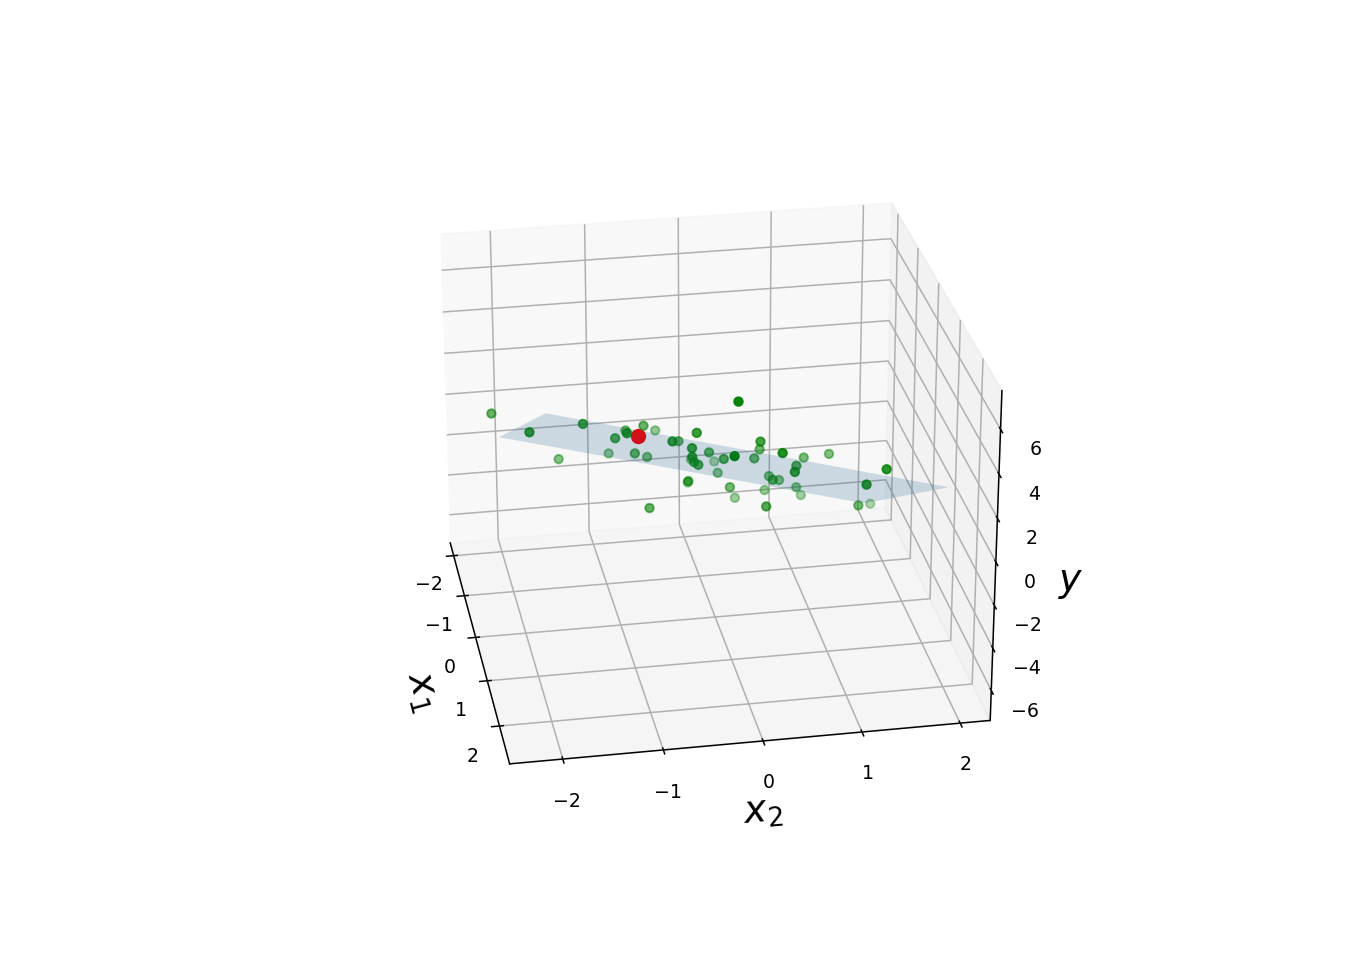

In [54]:
%matplotlib notebook
plt.close(plt.gcf())
plt.figure()


ax = plt.axes(projection='3d')

# a, b span plane
xlin = np.linspace(-2, 2, 10)
ylin = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(xlin, ylin)

# f(x,y) plane function
# See: http://math.stackexchange.com/questions/562123/equation-of-plane-containing-two-vectors
def f(X,Y):
    return w[0] + w[1]*X + w[2]*Y

Z = f(X,Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.2)


ax.scatter3D(xdata, ydata, zdata, c="g")
ax.scatter3D(1.3, -1, 4.076, c="r", s=50)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$y$', fontsize=20);